Now it's time to play with some data. You're going to work through the stages of model preparation we've covered in this lesson and write up each one. Keep a good record in a Jupyter notebook – we'll come back to your features in a future model-building assignment on Least Squares Regression.

Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.

Next, based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.

Finally, use filtering methods to select the five best features and justify your choices.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

Education 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

EnvironmentSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobInvolvement 
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

PerformanceRating 
1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

RelationshipSatisfaction 
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

WorkLifeBalance 1 'Bad' 2 'Good' 3 'Better' 4 'Best'

In [3]:
pd.set_option('display.max_columns',None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
df=df[['BusinessTravel','OverTime','Age','MonthlyIncome','DistanceFromHome','PercentSalaryHike','JobSatisfaction']]

In [6]:
df.shape

(1470, 7)

In [7]:
print("----Categorical Variables----")
print(" ")
print(df.BusinessTravel.value_counts())
print(" ")
print(df.OverTime.value_counts())
print(" ")
print("----Continuos Variables----")
print(" ")
print(df.Age.value_counts())
print(" ")
print(df.MonthlyIncome.value_counts())
print(" ")
print(df.DistanceFromHome.value_counts())
print(" ")
print(df.PercentSalaryHike.value_counts())
print("----Outcome Variables----")
print(" ")
print(df.JobSatisfaction.value_counts())

----Categorical Variables----
 
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
 
No     1054
Yes     416
Name: OverTime, dtype: int64
 
----Continuos Variables----
 
35    78
34    77
31    69
36    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
46    33
44    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
48    19
51    19
53    19
52    18
54    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64
 
2342     4
5562     3
2741     3
2451     3
2610     3
2380     3
6142     3
6347     3
2559     3
2404     3
3452     3
5769     2
3420     2
6397     2
4306     2
2743     2
3760     2
2720     2
4779     2
4284     2
5238     2
5228     2
2269     2
2996     2
9980     2
2782     2
5204     2
5993     2
4197     2
7756     2
        ..
3743     1
135

In [10]:
df.dtypes

BusinessTravel       object
OverTime             object
Age                   int64
MonthlyIncome         int64
DistanceFromHome      int64
PercentSalaryHike     int64
JobSatisfaction       int64
dtype: object

In [11]:
df.isnull().sum()

BusinessTravel       0
OverTime             0
Age                  0
MonthlyIncome        0
DistanceFromHome     0
PercentSalaryHike    0
JobSatisfaction      0
dtype: int64

In [12]:
df.describe()

,Age,MonthlyIncome,DistanceFromHome,PercentSalaryHike,JobSatisfaction
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,6502.931293,9.192517,15.209524,2.728571
std,9.135373,4707.956783,8.106864,3.659938,1.102846
min,18.000000,1009.000000,1.000000,11.000000,1.000000
25%,30.000000,2911.000000,2.000000,12.000000,2.000000
50%,36.000000,4919.000000,7.000000,14.000000,3.000000
75%,43.000000,8379.000000,14.000000,18.000000,4.000000
max,60.000000,19999.000000,29.000000,25.000000,4.000000


In [13]:
print(df.describe())

               Age  MonthlyIncome  DistanceFromHome  PercentSalaryHike  \
count  1470.000000    1470.000000       1470.000000        1470.000000   
mean     36.923810    6502.931293          9.192517          15.209524   
std       9.135373    4707.956783          8.106864           3.659938   
min      18.000000    1009.000000          1.000000          11.000000   
25%      30.000000    2911.000000          2.000000          12.000000   
50%      36.000000    4919.000000          7.000000          14.000000   
75%      43.000000    8379.000000         14.000000          18.000000   
max      60.000000   19999.000000         29.000000          25.000000   

       JobSatisfaction  
count      1470.000000  
mean          2.728571  
std           1.102846  
min           1.000000  
25%           2.000000  
50%           3.000000  
75%           4.000000  
max           4.000000  


(array([6., 7., 8., 4., 2., 5., 1., 5., 3., 2.]),
 array([ 4. , 11.4, 18.8, 26.2, 33.6, 41. , 48.4, 55.8, 63.2, 70.6, 78. ]),
 <a list of 10 Patch objects>)

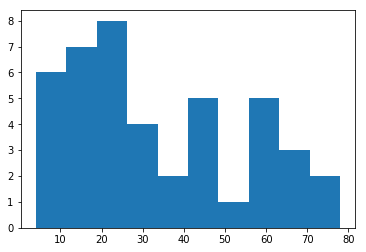

In [15]:
plt.hist(df.Age.value_counts())

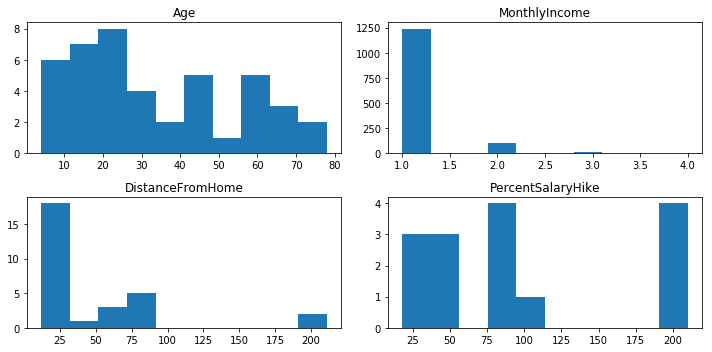

In [24]:
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
plt.hist(df.Age.value_counts())
plt.title('Age')

plt.subplot(2,2,2)
plt.hist(df.MonthlyIncome.value_counts())
plt.title('MonthlyIncome')

plt.subplot(2,2,3)
plt.hist(df.DistanceFromHome.value_counts())
plt.title('DistanceFromHome')

plt.subplot(2,2,4)
plt.hist(df.PercentSalaryHike.value_counts())
plt.title('PercentSalaryHike')

plt.tight_layout()

## Exoloring the data: Bivariate

### For two continuous variables

In [26]:
dg=df[['Age','MonthlyIncome','DistanceFromHome','PercentSalaryHike']]

c:\program files\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


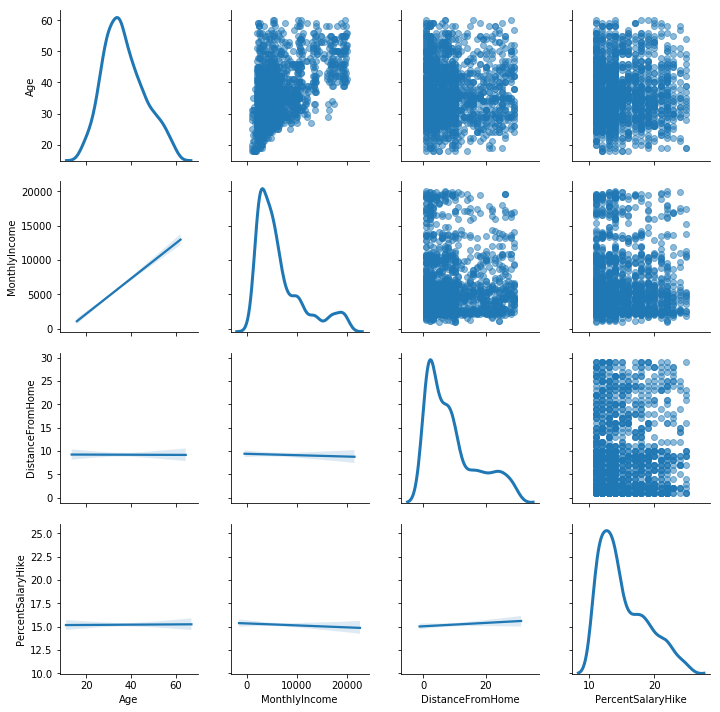

In [31]:
g=sns.PairGrid(dg,diag_sharey=False)
g.map_upper(plt.scatter,alpha=0.5)
g.map_lower(sns.regplot,scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot,lw=3)

In [33]:
corrmat=dg.corr()
print(corrmat)

                        Age  MonthlyIncome  DistanceFromHome  \
Age                1.000000       0.497855         -0.001686   
MonthlyIncome      0.497855       1.000000         -0.017014   
DistanceFromHome  -0.001686      -0.017014          1.000000   
PercentSalaryHike  0.003634      -0.027269          0.040235   

                   PercentSalaryHike  
Age                         0.003634  
MonthlyIncome              -0.027269  
DistanceFromHome            0.040235  
PercentSalaryHike           1.000000  


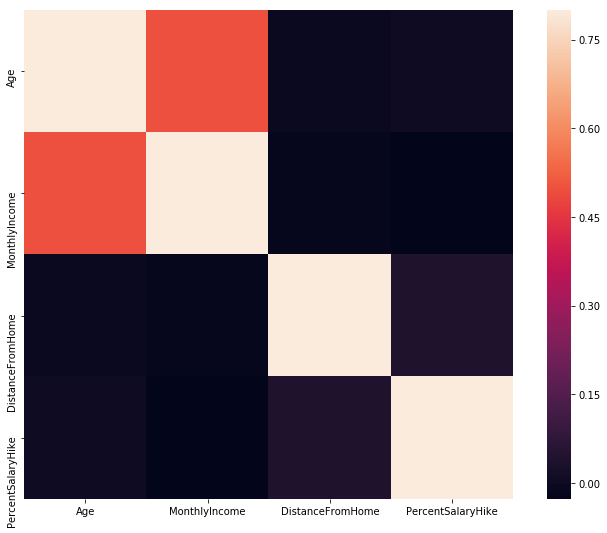

In [34]:
f,ax=plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=0.8,square=True)

### continuous vs categorical variable

In [35]:
db=df[['BusinessTravel','Age','MonthlyIncome','DistanceFromHome','PercentSalaryHike']]
dt=df[['OverTime','Age','MonthlyIncome','DistanceFromHome','PercentSalaryHike']]

In [42]:
db_long=pd.melt(db,id_vars=['BusinessTravel'])
dt_long=pd.melt(dt,id_vars=['OverTime'])

c:\program files\python37\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


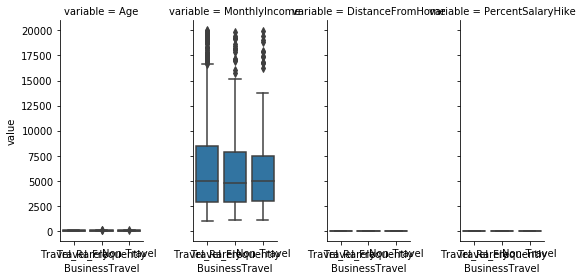

In [41]:
gb=sns.FacetGrid(db_long,col="variable",height=4,aspect=0.5)
gb=gb.map(sns.boxplot,"BusinessTravel","value")
plt.show()

c:\program files\python37\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


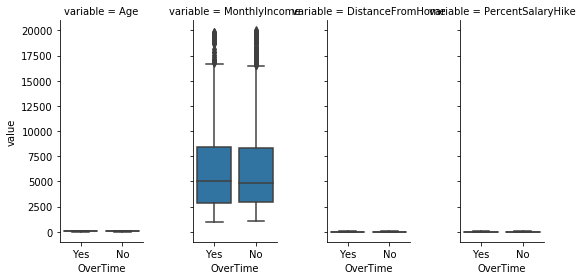

In [43]:
gt=sns.FacetGrid(dt_long,col="variable",height=4,aspect=0.5)
gt=gt.map(sns.boxplot,"OverTime","value")
plt.show()

In [45]:
print(df.groupby('OverTime').describe())

             Age                                                     \
           count       mean       std   min   25%   50%   75%   max   
OverTime                                                              
No        1054.0  36.762808  8.975894  18.0  30.0  35.0  42.0  60.0   
Yes        416.0  37.331731  9.526402  18.0  30.0  36.0  44.0  60.0   

         DistanceFromHome                                                 \
                    count      mean       std  min  25%  50%   75%   max   
OverTime                                                                   
No                 1054.0  9.062619  8.153086  1.0  2.0  7.0  13.0  29.0   
Yes                 416.0  9.521635  7.988818  1.0  2.0  7.0  15.0  29.0   

         JobSatisfaction                                               \
                   count      mean       std  min  25%  50%  75%  max   
OverTime                                                                
No                1054.0  2.711575  1.094022

In [48]:
print(stats.ttest_ind(df['Age'][df.OverTime=='Yes'],df['Age'][df.OverTime=='No']))

Ttest_indResult(statistic=1.0756184531226642, pvalue=0.28227467589630123)


In [49]:
df.head()

,BusinessTravel,OverTime,Age,MonthlyIncome,DistanceFromHome,PercentSalaryHike,JobSatisfaction
0,Travel_Rarely,Yes,41,5993,1,11,4
1,Travel_Frequently,No,49,5130,8,23,2
2,Travel_Rarely,Yes,37,2090,2,15,3
3,Travel_Frequently,Yes,33,2909,3,11,3
4,Travel_Rarely,No,27,3468,2,12,2


In [51]:
for col in df.loc[:,'Age':'PercentSalaryHike'].columns:
    print(col)
    print(stats.ttest_ind(df[col][df.OverTime=='Yes'],df[col][df.OverTime=='No']))

Age
Ttest_indResult(statistic=1.0756184531226642, pvalue=0.28227467589630123)
MonthlyIncome
Ttest_indResult(statistic=0.2333121788024749, pvalue=0.8155515298402164)
DistanceFromHome
Ttest_indResult(statistic=0.977860181908228, pvalue=0.3283045955970081)
PercentSalaryHike
Ttest_indResult(statistic=-0.20815904416985445, pvalue=0.8351336612431048)


In [53]:
for col in df.loc[:,'Age':'PercentSalaryHike'].columns:
    print(col)
    print(stats.ttest_ind(df[col][df.BusinessTravel=='Travel_Rarely'],df[col][df.BusinessTravel=='Travel_Frquently']))

Age
Ttest_indResult(statistic=nan, pvalue=nan)
MonthlyIncome
Ttest_indResult(statistic=nan, pvalue=nan)
DistanceFromHome
Ttest_indResult(statistic=nan, pvalue=nan)
PercentSalaryHike
Ttest_indResult(statistic=nan, pvalue=nan)


### categorical vs categorical variables

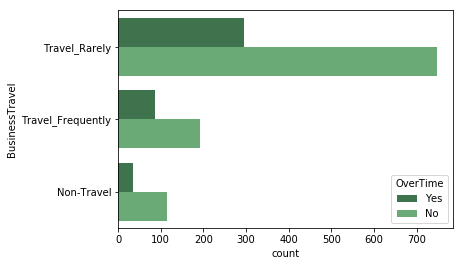

In [57]:
sns.countplot(y="BusinessTravel",hue="OverTime",data=df,palette="Greens_d")
plt.show()

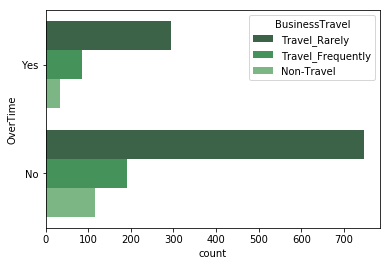

In [58]:
sns.countplot(y="OverTime",hue="BusinessTravel",data=df,palette="Greens_d")
plt.show()

In [59]:
countable=pd.crosstab(df['BusinessTravel'],df['OverTime'])
print(countable)

OverTime            No  Yes
BusinessTravel             
Non-Travel         115   35
Travel_Frequently  191   86
Travel_Rarely      748  295


In [60]:
print(stats.chisquare(countable,axis=None))

Power_divergenceResult(statistic=1406.9632653061224, pvalue=4.265573784596667e-302)


## Feature Engineering

In [61]:
print(df.OverTime.unique())

['Yes' 'No']


In [62]:
print(df.BusinessTravel.unique())

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']


### categorical variable

In [64]:
pd.get_dummies(df['OverTime'])

,No,Yes
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
5,1,0
6,0,1
7,1,0
8,1,0
9,1,0


In [65]:
features=pd.get_dummies(df['OverTime'])

In [66]:
features['OT']=np.where((df['OverTime'].isin(['Yes','No'])),1,0)

In [67]:
print(pd.crosstab(features['OT'],df['OverTime']))

OverTime    No  Yes
OT                 
1         1054  416


### change variable type

In [68]:
print(df.describe())

               Age  MonthlyIncome  DistanceFromHome  PercentSalaryHike  \
count  1470.000000    1470.000000       1470.000000        1470.000000   
mean     36.923810    6502.931293          9.192517          15.209524   
std       9.135373    4707.956783          8.106864           3.659938   
min      18.000000    1009.000000          1.000000          11.000000   
25%      30.000000    2911.000000          2.000000          12.000000   
50%      36.000000    4919.000000          7.000000          14.000000   
75%      43.000000    8379.000000         14.000000          18.000000   
max      60.000000   19999.000000         29.000000          25.000000   

       JobSatisfaction  
count      1470.000000  
mean          2.728571  
std           1.102846  
min           1.000000  
25%           2.000000  
50%           3.000000  
75%           4.000000  
max           4.000000  


In [69]:
features['Over40']=np.where(df['Age']>40,1,0)

In [70]:
print(features['Over40'])

0       1
1       1
2       0
3       0
4       0
5       0
6       1
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      0
25      1
26      0
27      1
28      1
29      1
       ..
1440    0
1441    1
1442    0
1443    1
1444    1
1445    1
1446    0
1447    0
1448    1
1449    0
1450    0
1451    0
1452    1
1453    0
1454    1
1455    0
1456    0
1457    0
1458    0
1459    0
1460    0
1461    1
1462    0
1463    0
1464    0
1465    0
1466    0
1467    0
1468    1
1469    0
Name: Over40, Length: 1470, dtype: int32


In [73]:
print(df['Age'].groupby(features['Over40']).describe())

         count       mean       std   min   25%   50%   75%   max
Over40                                                           
0       1005.0  31.831841  5.223928  18.0  28.0  32.0  36.0  40.0
1        465.0  47.929032  5.256494  41.0  43.0  47.0  52.0  60.0


### dealing with non-normality

(array([197., 268., 276., 274., 245.,  87.,  66.,  29.,  11.,  17.]),
 array([0.01666667, 0.02055556, 0.02444444, 0.02833333, 0.03222222,
        0.03611111, 0.04      , 0.04388889, 0.04777778, 0.05166667,
        0.05555556]),
 <a list of 10 Patch objects>)

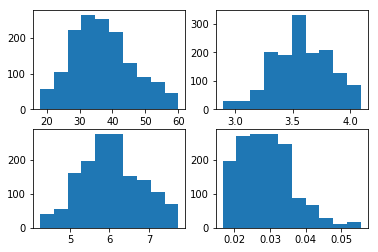

In [79]:
fig=plt.figure()

fig.add_subplot(221)
plt.hist(df['Age'])

fig.add_subplot(222)
plt.hist(np.log(df['Age']))

fig.add_subplot(223)
plt.hist(np.sqrt(df['Age']))

fig.add_subplot(224)
plt.hist(1/df['Age'])

In [80]:
features['log_age']=np.log(df['Age'])

In [81]:
features['age_squared']=df['Age']*df['Age']

In [82]:
print(features['age_squared'])

0       1681
1       2401
2       1369
3       1089
4        729
5       1024
6       3481
7        900
8       1444
9       1296
10      1225
11       841
12       961
13      1156
14       784
15       841
16      1024
17       484
18      2809
19      1444
20       576
21      1296
22      1156
23       441
24      1156
25      2809
26      1024
27      1764
28      1936
29      2116
        ... 
1440    1296
1441    3136
1442     841
1443    1764
1444    3136
1445    1681
1446    1156
1447    1296
1448    1681
1449    1024
1450    1225
1451    1444
1452    2500
1453    1296
1454    2025
1455    1600
1456    1225
1457    1600
1458    1225
1459     841
1460     841
1461    2500
1462    1521
1463     961
1464     676
1465    1296
1466    1521
1467     729
1468    2401
1469    1156
Name: age_squared, Length: 1470, dtype: int64


### Normalize all variables to the same scale (mean=0, standard deviation=1)

In [92]:
from sklearn import preprocessing

In [85]:
df_num=df.select_dtypes(include=[np.number])

In [86]:
df_num.head()

,Age,MonthlyIncome,DistanceFromHome,PercentSalaryHike,JobSatisfaction
0,41,5993,1,11,4
1,49,5130,8,23,2
2,37,2090,2,15,3
3,33,2909,3,11,3
4,27,3468,2,12,2


In [87]:
names=df_num.columns

In [88]:
names

Index(['Age', 'MonthlyIncome', 'DistanceFromHome', 'PercentSalaryHike',
       'JobSatisfaction'],
      dtype='object')

In [89]:
df_scaled=pd.DataFrame(preprocessing.scale(df_num),columns=names)

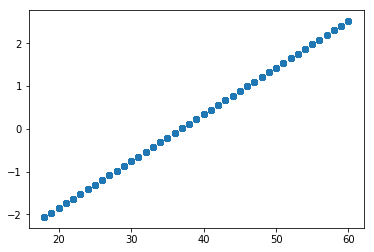

In [90]:
plt.scatter(df_num['Age'],df_scaled['Age'])

In [91]:
print(df_scaled.describe())

                Age  MonthlyIncome  DistanceFromHome  PercentSalaryHike  \
count  1.470000e+03   1.470000e+03      1.470000e+03       1.470000e+03   
mean  -3.504377e-17  -4.471102e-17      4.350262e-17       2.271803e-16   
std    1.000340e+00   1.000340e+00      1.000340e+00       1.000340e+00   
min   -2.072192e+00  -1.167343e+00     -1.010909e+00      -1.150554e+00   
25%   -7.581700e-01  -7.632087e-01     -8.875151e-01      -8.772324e-01   
50%   -1.011589e-01  -3.365516e-01     -2.705440e-01      -3.305891e-01   
75%    6.653541e-01   3.986245e-01      5.932157e-01       7.626976e-01   
max    2.526886e+00   2.867626e+00      2.444129e+00       2.675949e+00   

       JobSatisfaction  
count     1.470000e+03  
mean     -9.183886e-17  
std       1.000340e+00  
min      -1.567907e+00  
25%      -6.608532e-01  
50%       2.462002e-01  
75%       1.153254e+00  
max       1.153254e+00  
